In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
train['TUE'].dtype

dtype('float64')

In [5]:
from sklearn.preprocessing import LabelEncoder
myencoder=LabelEncoder()
def categorical_(df,myencoder):
    for i in df.columns:
        if df[i].dtype=='object':
            df[i]=myencoder.fit_transform(df[i])
    return df
            
    
    

In [6]:
train=categorical_(train,myencoder)

In [72]:
test=categorical_(test,myencoder)

In [73]:


test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  int64  
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  int64  
 6   FAVC                            13840 non-null  int64  
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  int64  
 10  SMOKE                           13840 non-null  int64  
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [8]:
train=categorical_(train,myencoder)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [10]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


In [11]:
test['FAVC'].unique()

array(['yes', 'no'], dtype=object)

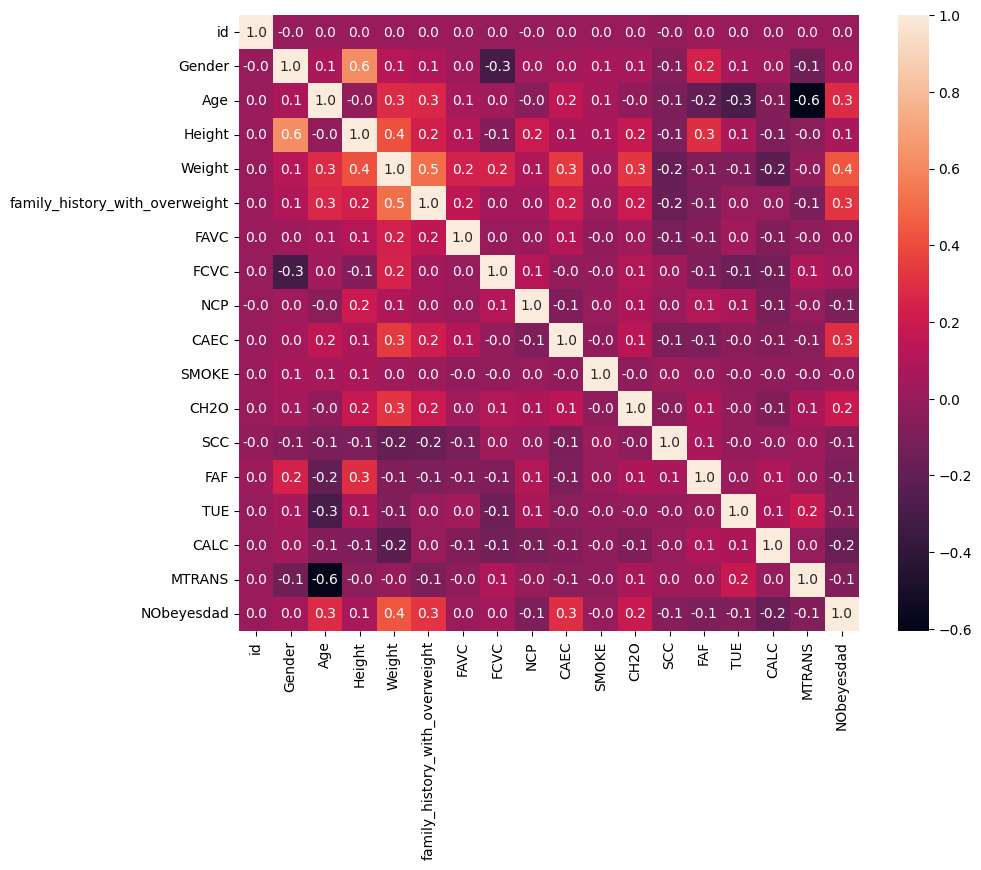

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8)) 
sns.heatmap(train.corr(),annot=True, fmt=".1f")
plt.show()



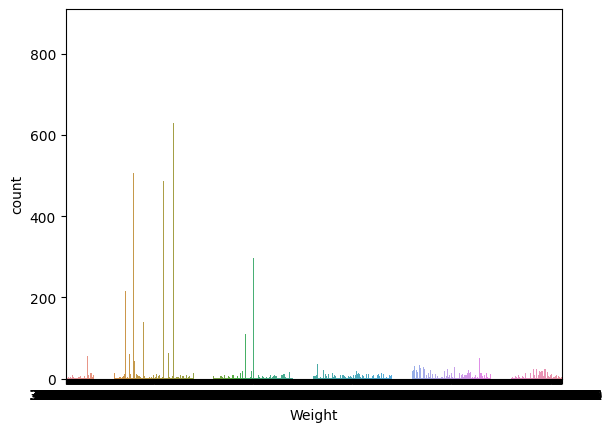

In [13]:
# plt.bar(train['NObeyesdad'],train['Weight'])
sns.countplot(train['NObeyesdad'],x=train['Weight'])
# plt.xticks([0, 1], ['0', '1'])
plt.show()

In [14]:
train.family_history_with_overweight.info

<bound method Series.info of 0        1
1        1
2        1
3        1
4        1
        ..
20753    1
20754    0
20755    1
20756    1
20757    1
Name: family_history_with_overweight, Length: 20758, dtype: int64>

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [16]:
y=train['NObeyesdad']
X=train.drop('NObeyesdad',axis=1)

In [17]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [18]:
X_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
19390,19390,0,26.000000,1.626503,110.217340,1,1,3.000000,3.0,2,0,2.704636,0,0.000000,0.824607,1,3
1991,1991,1,23.120215,1.755467,82.603984,1,1,1.952987,1.0,2,0,2.000000,0,0.792929,0.000000,1,3
19951,19951,0,25.967010,1.622297,107.998815,1,1,3.000000,3.0,2,0,2.474518,0,0.000000,0.368472,1,3
3946,3946,1,22.980957,1.756550,89.667406,1,1,2.000000,1.0,2,0,2.000000,0,0.000000,0.645400,1,3
1575,1575,0,25.565662,1.629491,104.988082,1,1,3.000000,3.0,2,0,2.654702,0,0.269902,0.625350,1,3


In [19]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max scaling only to the numerical columns
scaler = MinMaxScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])


In [20]:
X_train=X_train.drop('id',axis=1)
X_test=X_test.drop('id',axis=1)

In [74]:
numerical_columns = test.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max scaling only to the numerical columns
scaler = MinMaxScaler()
test[numerical_columns] = scaler.fit_transform(test[numerical_columns])

In [21]:
y_train.head()

19390    4
1991     5
19951    4
3946     6
1575     4
Name: NObeyesdad, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [45]:

from sklearn.linear_model import LogisticRegression

model2=LogisticRegression(max_iter=10000,multi_class='multinomial')

model2.fit(X_train,y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [46]:
from sklearn.metrics import accuracy_score



preds=model.predict(X_test)
pred2=model2.predict(X_test)

In [47]:
a=accuracy_score(y_test,preds)
b=accuracy_score(y_test,pred2)

In [48]:
print(a,b)

0.8101007152240549 0.8101007152240549


In [36]:
preds[0]

4

In [37]:
y_test[0]

6

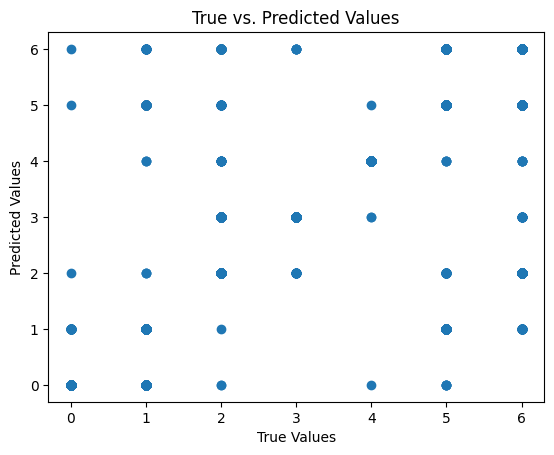

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()



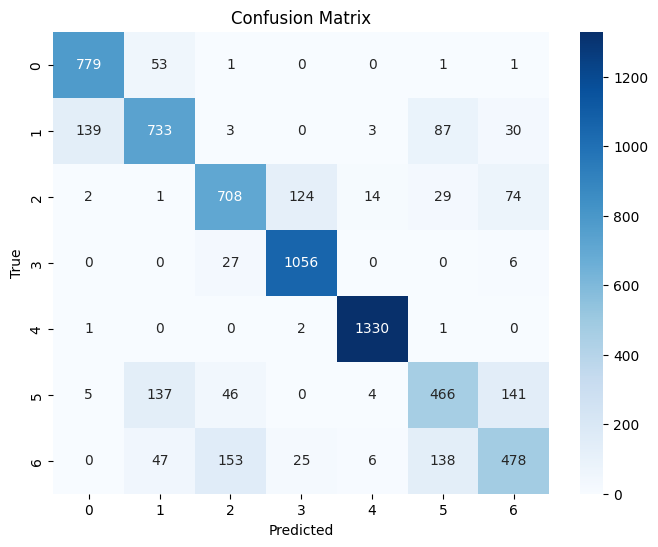

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [50]:
from sklearn.ensemble import HistGradientBoostingClassifier

model3=HistGradientBoostingClassifier()

model3.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [54]:
pred3=model3.predict(X_test)

In [55]:
c=accuracy_score(y_test,pred3)

In [56]:
print(c)

0.8975332068311196


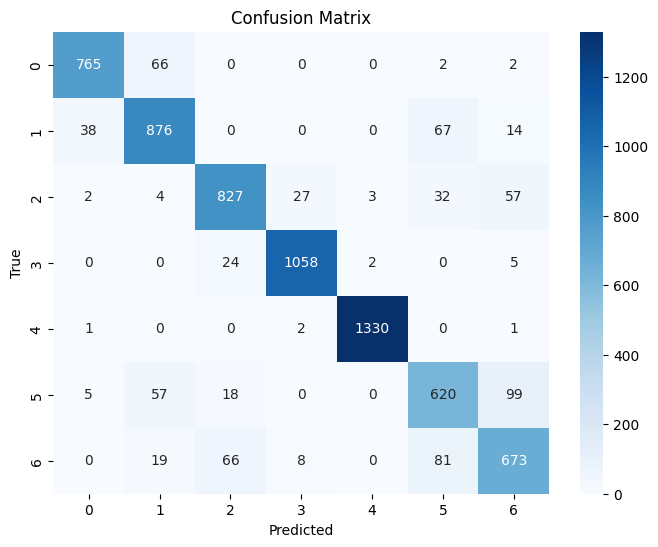

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [58]:
pred3[0]

4

In [59]:
y_test[0]

6

In [61]:
pred3 = myencoder.inverse_transform(pred3)

In [62]:
y_test=myencoder.inverse_transform(y_test)

In [64]:
y_test[:5]

array(['Obesity_Type_III', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obesity_Type_II', 'Insufficient_Weight'], dtype=object)

In [65]:
pred3[:5]

array(['Obesity_Type_III', 'Overweight_Level_I', 'Obesity_Type_I',
       'Obesity_Type_II', 'Normal_Weight'], dtype=object)

In [67]:
pred3

array(['Obesity_Type_III', 'Overweight_Level_I', 'Obesity_Type_I', ...,
       'Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I'],
      dtype=object)

In [ ]:
import pandas as pd

# Assuming 'test_data' is your test set DataFrame with columns 'ID' and other features

# Convert the NumPy array 'preds' to a list (if necessary)
# preds_list = preds.tolist()

# Create a DataFrame with 'ID' and 'Predicted' columns
submission_df = pd.DataFrame({'ID': ['ID'], 'Predicted': pred3})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  float64
 1   Gender                          13840 non-null  float64
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  float64
 6   FAVC                            13840 non-null  float64
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  float64
 10  SMOKE                           13840 non-null  float64
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [80]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.000000,1.0,0.274466,0.751498,0.647675,1.0,1.0,0.969308,0.666667,0.666667,0.0,0.912815,0.0,0.285133,0.000000,0.666667,0.75
1,0.000072,0.0,0.148936,0.283019,0.214188,1.0,1.0,0.500000,0.000000,0.666667,0.0,1.000000,0.0,0.333333,0.000000,0.666667,0.75
2,0.000145,0.0,0.255319,0.364821,0.575933,1.0,1.0,1.000000,0.666667,0.666667,0.0,0.810939,0.0,0.000000,0.125251,0.666667,0.75
3,0.000217,1.0,0.148495,0.194579,0.513014,1.0,1.0,0.500000,0.659303,0.666667,0.0,0.893209,0.0,0.031617,0.000000,0.666667,0.75
4,0.000289,0.0,0.255319,0.334709,0.522265,1.0,1.0,1.000000,0.666667,0.666667,0.0,0.826766,0.0,0.000000,0.370534,0.666667,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0.999711,1.0,0.198465,0.512045,0.309624,1.0,0.0,0.906617,0.666667,0.666667,0.0,0.000000,0.0,0.269025,0.389316,0.666667,0.75
13836,0.999783,0.0,0.319149,0.264151,0.182457,0.0,1.0,1.000000,0.666667,0.666667,0.0,0.500000,0.0,0.000000,0.000000,0.666667,0.75
13837,0.999855,0.0,0.190119,0.255749,0.042652,0.0,1.0,1.000000,0.424580,0.333333,0.0,0.500000,0.0,0.649947,0.500000,0.666667,0.75
13838,0.999928,1.0,0.148936,0.320755,0.111061,1.0,1.0,0.500000,0.666667,0.666667,0.0,0.500000,0.0,1.000000,1.000000,1.000000,0.75


In [79]:

pred4=model3.predict(test2)


In [81]:
pred4

array([3, 5, 4, ..., 0, 1, 3])